In [4]:
import numpy as np 
def loadData(filename):
    data=open(filename,'r').readlines()
    datasetx=[]
    datasety=[]
    for line in data:
        Stringlist = ('1,'+line).split(',')
        Stringlist[0]=float(Stringlist[0])
        Stringlist[1]=float(Stringlist[1])
        Stringlist[2]=float(Stringlist[2])
        Stringlist[3]=float(Stringlist[3])
        Stringlist[5]=int(Stringlist[5])
        datasetx.append(Stringlist[:4])
        datasety.append(Stringlist[5])
    return np.array(datasetx),np.array(datasety)

In [5]:
def Percetron_Learning_nonlinear(X,y,learning_rate):
    m,n=X.shape
    w=np.random.random(n)
    w_record=[]
    w_constraint=[]
    times=0
    while True:
        i=np.random.randint(m)
        if y[i]==1 and np.dot(w,X[i,:])<0:
            w=w+learning_rate*X[i,:]
        elif y[i]==-1 and np.dot(w,X[i,:])>=0:
            w=w-learning_rate*X[i,:]

        predict=predict_y(X,w)
        
        constraint=0
        for p in range(len(predict)):
            if predict[p]!=y[p]:
                constraint+=1
        w_record.append(w)
        w_constraint.append(constraint)
        times+=1
        if times>7000:
            index=w_constraint.index(min(w_constraint))
            final_w=w_record[index]
            accuracy=1-float(min(w_constraint))/float(m)
            print('accuracy:',accuracy)
            break
    return final_w,w_record,w_constraint
 #指示函数
def predict_y(X,w):
    predict=np.dot(X,w)
    predict[predict>=0]=1
    predict[predict<0]=-1
    return predict

In [6]:
X,y=loadData("classification.txt")
learning_rate=0.1
#np.random.random()
w,w_record,w_constraint=Percetron_Learning_nonlinear(X,y,learning_rate)
print('weight:',w)

accuracy: 0.5355
weight: [ 0.01360815 -0.12665763  0.08826616  0.00923548]


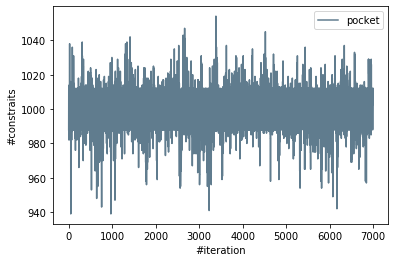

In [10]:
#画图  
import numpy as np
import matplotlib.pyplot as plt  
x1=[]
y1=[]
for i in range(len(w_constraint)):
    x1.append(i)
    y1.append(w_constraint[i])
l1=plt.plot(x1,y1,color='#607c8e',label='pocket')
plt.xlabel('#iteration')
plt.ylabel('#constraits')
plt.legend()
plt.show()
                                 